In [28]:
import sys  
sys.path.insert(0, '../code')

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import experiment_manager as xpm
import pandas as pd

In [198]:
list_of_experiments = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big",
                                                 only_finished=True)

Loaded  80  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_big

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['ConvNet'], 'n_clients': [100], 'dirichlet_alpha': [0.1, 100.0], 'x_transform': [None, 'rotation'], 'y_transform': [None, 'shift'], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['conv', '.*weight.*', 'weight', '.*bias.*', 'bias', 'fc', 'all|.', 'conv|fc1', '^((?!fc3\\.bias).)*$', 'none'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_big/'], 'job_id': [[49035], [51258], [49037]], 'finished': [True], 'log_id': [98133, 31620, 74725, 61538, 83586, 61220, 99693, 28834, 88688, 56057, 72332, 75789, 90646, 83146, 67046, 10571, 36592, 95792, 81219, 38049, 98387, 35598, 33595, 26800, 38114, 1115, 67260, 35675, 33361, 87674, 72406, 40703, 47340, 75951, 85312, 2451, 77175, 68676, 12062, 6145, 29152, 62148, 4800, 38397, 43052, 69814, 

In [104]:
routing = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_routing",
                                                 only_finished=True)

Loaded  8  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_routing

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['RoutingNet'], 'n_clients': [100], 'dirichlet_alpha': [0.1, 100.0], 'x_transform': [None, 'rotation'], 'y_transform': ['shift', None], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['^((?!loc).)*$'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_routing/'], 'job_id': [[]], 'finished': [True], 'log_id': [75019, 44619, 29917, 64661, 51737, 81046, 98907, 14320]}

Tracked Variables: 
 ['client_accuracies', 'mean_accuracy', 'communication_round', 'epochs']


In [199]:
results = np.zeros([9, 8])
layers = [ 'conv', 'fc', '.*bias.*', '.*weight.*', 'conv|fc1', '^((?!fc3\\.bias).)*$', 'all|.',  'none',
         "^((?!loc).)*$"]

for xp in list_of_experiments+routing:
    r = xp.results
    hp = xp.hyperparameters    
    
    row = np.argwhere(np.array(layers)==hp["layers"]).flatten()
    
    i = {None : 0, 'rotation' : 1}[hp["x_transform"]]
    j = {None : 0, 'shift' : 1}[hp["y_transform"]]
    k = {100.0 : 0, 0.1 : 1}[hp["dirichlet_alpha"]]
    if "mean_accuracy" in r:
        mean = r["mean_accuracy"]
    else:
        mean = np.mean(r["client_accuracies"], axis=1)    
    results[row, 4*i+2*j+k] = mean[-1]

In [200]:
columns = ["{} {} {}".format(x_t, y_t, a) 
            for x_t in ["", "rot"] for y_t in ["", "shift"] for a in ["iid", "non-iid"] ]

In [201]:
frame = pd.DataFrame(results, index=layers, columns=columns)

In [202]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
frame.style.apply(highlight_max)

,iid,non-iid,shift iid,shift non-iid,rot iid,rot non-iid,rot shift iid,rot shift non-iid
conv,0.510981,0.801792,0.506561,0.799769,0.510453,0.805695,0.511818,0.807683
fc,0.643635,0.744329,0.308407,0.657764,0.496981,0.674356,0.272832,0.656593
.*bias.*,0.508769,0.794483,0.503483,0.782682,0.505618,0.795323,0.495284,0.794136
.*weight.*,0.810714,0.762386,0.028837,0.135820,0.579121,0.433405,0.036645,0.161496
conv|fc1,0.508010,0.803649,0.515592,0.812887,0.475586,0.782315,0.466417,0.787669
^((?!fc3\.bias).)*$,0.808995,0.735379,0.027175,0.078497,0.531005,0.433789,0.037484,0.098032
all|.,0.809618,0.715953,0.017920,0.046763,0.520468,0.372686,0.025373,0.066332
none,0.502628,0.791873,0.503652,0.791320,0.496529,0.782077,0.494302,0.792375
^((?!loc).)*$,0.666043,0.873979,0.490320,0.779910,0.523780,0.788974,0.480113,0.778561


In [203]:
sizes =  {"conv1.weight":150,"conv1.bias":6,"conv2.weight":2400,"conv2.bias":16,
 "fc1.weight":120*256,"fc1.bias":120,"fc2.weight":84*120,"fc2.bias":84,
 "fc3.weight":62*84,"fc3.bias":62}


In [204]:
pd.DataFrame(np.array([np.sum([v for k, v in sizes.items() if re.match(l, k)]) for l in layers]).reshape(1,-1),
            columns=layers, index=["communication"])

,conv,fc,.*bias.*,.*weight.*,conv|fc1,^((?!fc3\.bias).)*$,all|.,none,^((?!loc).)*$
communication,2572.0,46274.0,288.0,48558.0,33412.0,48784.0,48846.0,0.0,48846.0


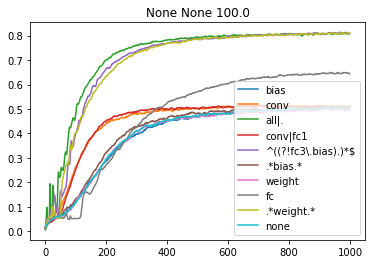

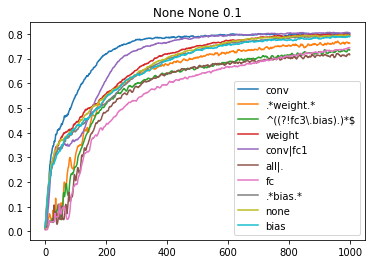

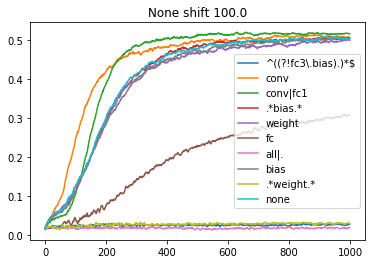

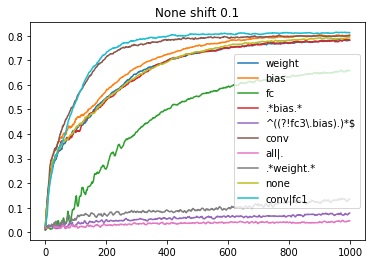

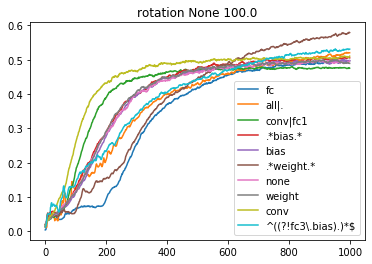

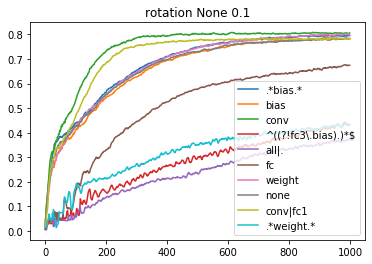

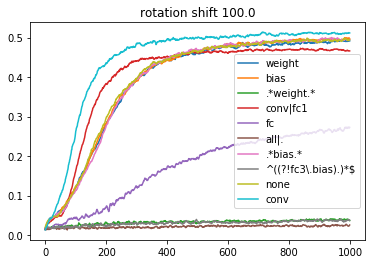

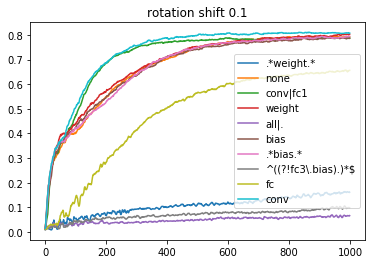

In [205]:
for x_t in [None, 'rotation']:
    for y_t in [None, 'shift']:
        for alpha in [100.0, 0.1]:

            xps = filter(lambda x : x.hyperparameters["x_transform"]==x_t and
                                    x.hyperparameters["y_transform"]==y_t and
                                     x.hyperparameters["dirichlet_alpha"] == alpha,
                        list_of_experiments)
            for xp in xps:
                r = xp.results
                hp = xp.hyperparameters

                if "mean_accuracy" in r:
                    mean = r["mean_accuracy"]
                else:
                    mean = np.mean(r["client_accuracies"], axis=1)

                plt.plot(mean, label=hp["layers"])
                plt.title("{} {} {}".format(x_t, y_t, alpha))

            plt.legend()
            plt.show()

In [219]:
angles = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_angles",
                                                 only_finished=True)

Loaded  8  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_compare_angles

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['ConvNet'], 'n_clients': [100], 'dirichlet_alpha': [100.0, 0.1], 'x_transform': [None, 'rotation'], 'y_transform': [None, 'shift'], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['all|.'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_compare_angles/'], 'job_id': [[52193]], 'finished': [True], 'log_id': [86040, 23394, 55214, 71275, 72430, 22075, 74522, 68959]}

Tracked Variables: 
 ['shared_layers', 'client_accuracies', 'mean_accuracy', 'communication_round', 'epochs', 'sim_conv1.weight', 'sim_conv1.bias', 'sim_conv2.weight', 'sim_conv2.bias', 'sim_fc1.weight', 'sim_fc1.bias', 'sim_fc2.weight', 'sim_fc2.bias', 'sim_fc3.weight', 'sim_fc3.bias']


In [220]:
sym = []
names = []

for xp in angles:
    hp = xp.hyperparameters
    names += ["{} {} {}".format(hp["dirichlet_alpha"], hp["x_transform"], hp["y_transform"])]

    sym += [[np.mean(v) for r, v in xp.results.items() if "sim" in r]]
l = [r for r, v in xp.results.items() if "sim" in r]
        
    

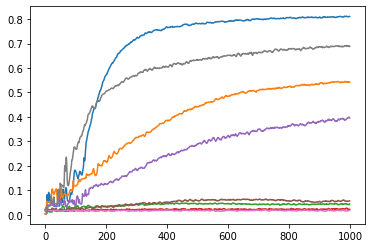

In [222]:
for xp in angles:
    hp = xp.hyperparameters
    r = xp.results
    
    plt.plot(np.mean(r["client_accuracies"], axis=1))
    
plt.show()

In [221]:
symframe = pd.DataFrame(sym, index=names, columns=l)
def highlight_max(s):
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]
symframe.T.style.apply(highlight_max)

,100.0 None None,100.0 rotation None,0.1 None shift,100.0 rotation shift,0.1 rotation None,0.1 rotation shift,100.0 None shift,0.1 None None
sim_conv1.weight,0.064144,0.019428,0.007399,0.075278,0.022367,0.003281,0.094948,0.014985
sim_conv1.bias,0.053434,0.020496,0.008227,0.005116,0.010087,0.011689,0.048957,0.005109
sim_conv2.weight,0.036297,0.012727,0.004623,0.007235,0.007018,0.006467,0.011522,0.011584
sim_conv2.bias,0.062549,0.030396,0.006329,0.013568,0.005049,0.007431,0.016735,0.009083
sim_fc1.weight,0.013692,0.008229,0.002491,0.006032,0.003831,0.002321,0.005591,0.005688
sim_fc1.bias,0.024018,0.011956,0.002394,0.009328,0.003446,0.002257,0.008263,0.003681
sim_fc2.weight,0.018298,0.012036,0.003133,0.005671,0.005482,0.004278,0.005205,0.006887
sim_fc2.bias,0.023016,0.011820,0.002174,0.011297,0.003839,0.004835,0.005821,0.005145
sim_fc3.weight,0.074662,0.119957,0.527145,0.397472,0.384636,0.578319,0.474935,0.388226
sim_fc3.bias,0.020912,0.021271,0.475779,0.175102,0.334514,0.488896,0.141768,0.257363


In [360]:
serverangles = xpm.get_list_of_experiments("/home/sattler/Workspace/PyTorch/multilayer/results/layers_server_angles",
                                                 only_finished=False)

Loaded  1  Results from  /home/sattler/Workspace/PyTorch/multilayer/results/layers_server_angles

Hyperparameters: 
 {'dataset': ['EMNIST'], 'net': ['ConvNet'], 'n_clients': [100], 'dirichlet_alpha': [100.0], 'x_transform': ['rotation'], 'y_transform': [None], 'communication_rounds': [1000], 'local_epochs': [1], 'participation_rate': [0.1], 'batch_size': [128], 'layers': ['all|.'], 'pretrained': [None], 'save_model': [None], 'log_frequency': [-100], 'log_path': ['layers_server_angles/'], 'job_id': [[]], 'finished': [False], 'log_id': [15021]}

Tracked Variables: 
 ['shared_layers', 'client_accuracies', 'mean_accuracy', 'client_56_conv1.weight', 'client_56_conv1.bias', 'client_56_conv2.weight', 'client_56_conv2.bias', 'client_56_fc1.weight', 'client_56_fc1.bias', 'client_56_fc2.weight', 'client_56_fc2.bias', 'client_56_fc3.weight', 'client_56_fc3.bias', 'client_35_conv1.weight', 'client_35_conv1.bias', 'client_35_conv2.weight', 'client_35_conv2.bias', 'client_35_fc1.weight', 'client_35_

In [361]:
xp = serverangles[0]
r = xp.results

In [371]:
fr = {k : v for k, v in r.items() if "client_" in k and "acc" not in k}

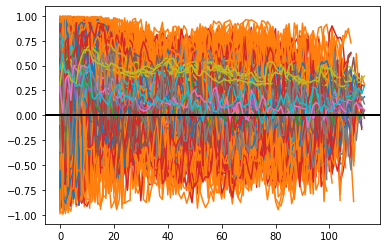

In [372]:
for k, v in fr.items():
    plt.plot(v, label=k)
    plt.axhline(y=0, color="k")
    
#plt.legend(loc="lower left")
plt.show()